<a href="https://colab.research.google.com/github/20hnu/EDA/blob/main/Mental_health_in_the_pregnancy_during_the_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mental_health = pd.read_csv("/content/drive/MyDrive/EDA/Pregnancy During the COVID-19 Pandemic.csv")

In [ ]:
mental_health_copy = pd.read_csv("/content/drive/MyDrive/EDA/Pregnancy During the COVID-19 Pandemic.csv")

In [ ]:
mental_health.head(5)

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,1,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,English,2,3,27
1,2,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,English,2,33,92
2,3,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,,,
3,4,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,French,53,67,54
4,5,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,English,23,32,71


In [ ]:
mental_health .columns

Index(['OSF_ID', 'Maternal_Age', 'Household_Income', 'Maternal_Education',
       'Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety',
       'Gestational_Age_At_Birth',
       'Delivery_Date(converted to month and year)', 'Birth_Length',
       'Birth_Weight', 'Delivery_Mode', 'NICU_Stay', 'Language',
       'Threaten_Life', 'Threaten_Baby_Danger', 'Threaten_Baby_Harm'],
      dtype='object')

In [ ]:
mental_health .drop(columns=["OSF_ID","Language"],inplace=True)

In [ ]:
mental_health.head(5)

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,2,3,27
1,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2,33,92
2,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
3,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,53,67,54
4,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23,32,71


In [ ]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Maternal_Age                                10661 non-null  float64
 1   Household_Income                            10521 non-null  object 
 2   Maternal_Education                          10595 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 4   PROMIS_Anxiety                              9566 non-null   float64
 5   Gestational_Age_At_Birth                    6734 non-null   float64
 6   Delivery_Date(converted to month and year)  6733 non-null   object 
 7   Birth_Length                                5480 non-null   float64
 8   Birth_Weight                                6078 non-null   float64
 9   Delivery_Mode                               5537 non-null   object 
 10  NICU_Stay 

In [ ]:
#indentifying rows to drop
rows_to_drop= mental_health[(mental_health['PROMIS_Anxiety'].isnull())&(mental_health['Delivery_Date(converted to month and year)'].isnull())&(
    mental_health['Threaten_Life']==' ')&(mental_health['Threaten_Baby_Danger']==' ')&(mental_health['Threaten_Baby_Harm']==' ')].index

In [ ]:
mental_health.drop(rows_to_drop, inplace=True)

In [ ]:
#null values
mental_health.isnull().sum()/mental_health.shape[0]*100

,0
Maternal_Age,0.864749
Household_Income,2.176448
Maternal_Education,1.486592
Edinburgh_Postnatal_Depression_Scale,6.743101
PROMIS_Anxiety,7.054023
Gestational_Age_At_Birth,34.570540
Delivery_Date(converted to month and year),34.580257
Birth_Length,46.754761
Birth_Weight,40.944423
Delivery_Mode,46.200933


In [ ]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10771
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Maternal_Age                                10203 non-null  float64
 1   Household_Income                            10068 non-null  object 
 2   Maternal_Education                          10139 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 4   PROMIS_Anxiety                              9566 non-null   float64
 5   Gestational_Age_At_Birth                    6734 non-null   float64
 6   Delivery_Date(converted to month and year)  6733 non-null   object 
 7   Birth_Length                                5480 non-null   float64
 8   Birth_Weight                                6078 non-null   float64
 9   Delivery_Mode                               5537 non-null   object 
 10  NICU_Stay      

In [ ]:
#plots numerical graphs
numerical_df = mental_health.select_dtypes(include=['number'])


In [ ]:
numerical_df

,Maternal_Age,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Birth_Length,Birth_Weight
0,38.3,9.0,13.0,39.71,49.20,3431.0
1,34.6,4.0,17.0,NaN,NaN,NaN
3,28.8,9.0,20.0,38.57,41.00,2534.0
4,36.5,14.0,20.0,39.86,53.34,3714.0
5,38.3,3.0,8.0,38.57,NaN,NaN
...,...,...,...,...,...,...
10766,32.7,15.0,27.0,NaN,NaN,NaN
10767,38.3,10.0,18.0,NaN,NaN,NaN
10769,27.7,4.0,15.0,NaN,NaN,NaN
10770,23.0,12.0,19.0,NaN,NaN,NaN


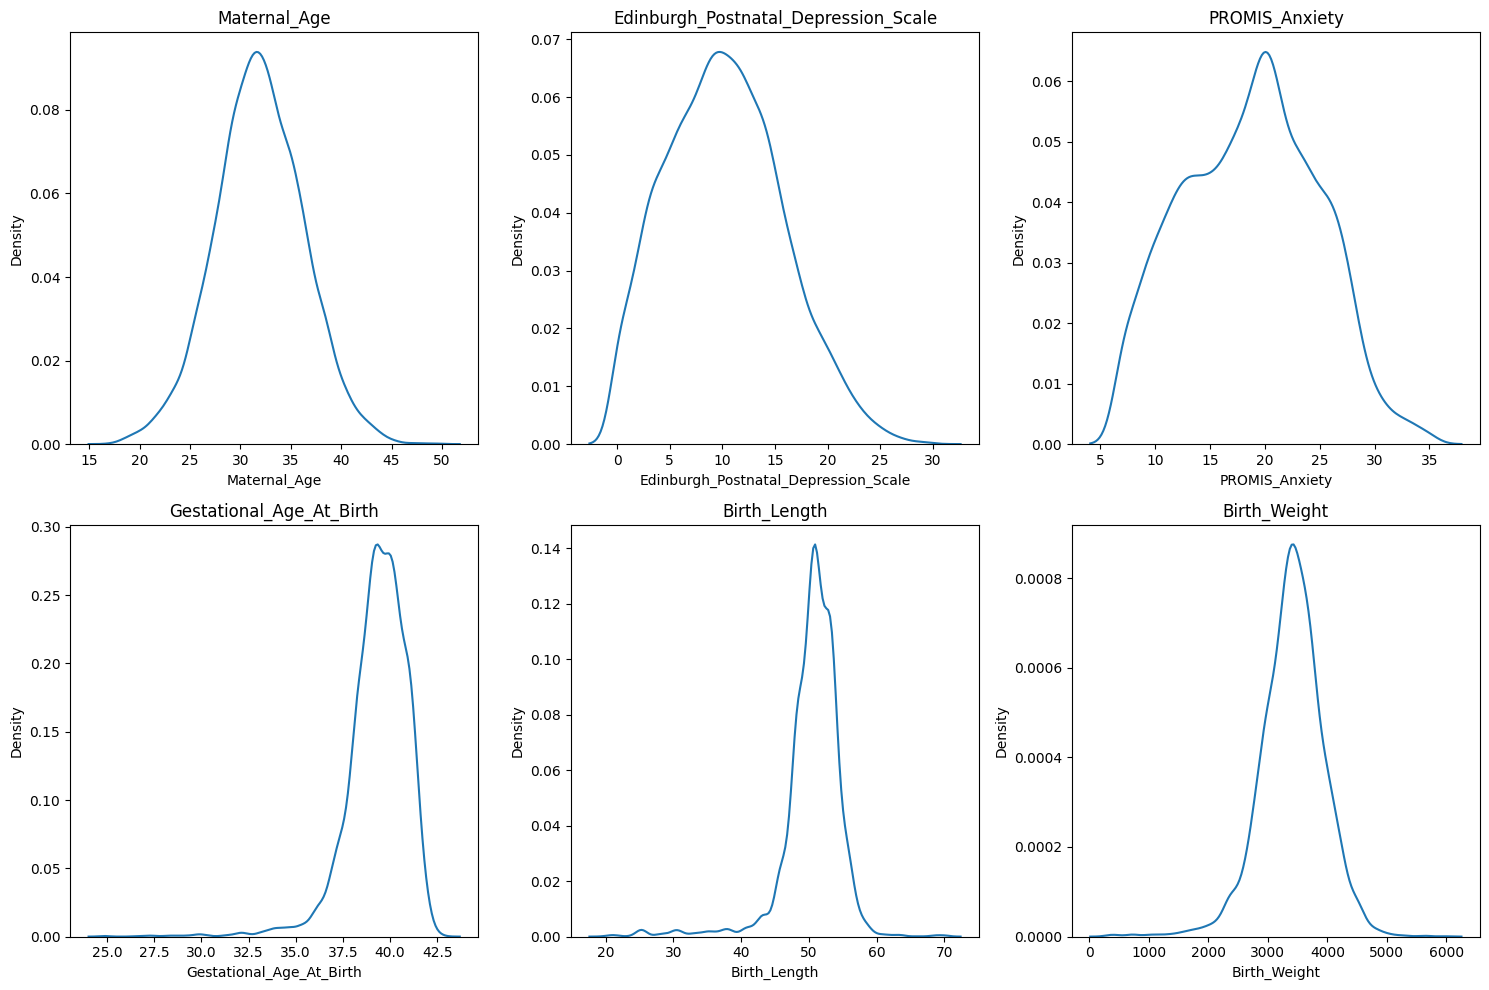

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(numerical_df.columns):
    sns.kdeplot(data=numerical_df, x=column, ax=axs[i])
    axs[i].set_title(column)


plt.tight_layout()
plt.show()

In [ ]:
print(mental_health['Household_Income'].value_counts())
print(' ')
print(" ")
print(mental_health['Maternal_Education'].value_counts())
print(' ')
print(" ")
print(mental_health['Delivery_Mode'].value_counts())
print(' ')
print(" ")
print(mental_health['NICU_Stay'].value_counts())

Household_Income
$70,000-$99,999        2006
$100,000 -$124,999     1886
$40,000-$69,999        1348
$125,000- $149,999     1315
$150,000 - $174,999    1115
$200,000+               977
$175,000- $199,999      641
$20,000- $39,999        561
Less than $20, 000      219
Name: count, dtype: int64
 
 
Maternal_Education
Undergraduate degree             3979
College/trade school             2588
Masters degree                   1849
High school diploma               835
Doctoral Degree                   767
Less than high school diploma     121
Name: count, dtype: int64
 
 
Delivery_Mode
Vaginally                        3904
Caesarean-section (c-section)    1633
Name: count, dtype: int64
 
 
NICU_Stay
No     4986
Yes     548
Name: count, dtype: int64


In [ ]:
mental_health["Threaten_Life"] = mental_health["Threaten_Life"].replace(' ',-1).astype(int)

In [ ]:
mental_health[mental_health["Threaten_Life"] == -1]

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
7,NaN,NaN,NaN,NaN,NaN,38.00,May2021,50.17,2892.0,Caesarean-section (c-section),Yes,-1,,
11,29.5,NaN,Undergraduate degree,NaN,NaN,38.71,Sep2021,54.61,3913.0,Caesarean-section (c-section),No,-1,,
21,34.3,"$40,000-$69,999",Undergraduate degree,NaN,NaN,37.86,Jun2021,46.99,2694.0,Vaginally,No,-1,,
102,NaN,NaN,NaN,NaN,NaN,38.29,Jun2021,43.18,2325.0,Vaginally,No,-1,,
132,NaN,NaN,NaN,NaN,NaN,36.71,Jan2021,NaN,NaN,NaN,NaN,-1,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,31.8,"$40,000-$69,999",College/trade school,NaN,NaN,34.71,Jan2021,45.72,2410.0,Caesarean-section (c-section),Yes,-1,,
10629,30.7,"$100,000 -$124,999",High school diploma,NaN,NaN,37.29,Apr2021,50.80,3799.0,Caesarean-section (c-section),No,-1,,
10660,28.4,NaN,Undergraduate degree,NaN,NaN,40.43,Apr2021,NaN,3600.0,NaN,NaN,-1,,
10683,32.6,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,40.57,Apr2021,NaN,NaN,NaN,NaN,-1,,


In [ ]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10771
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Maternal_Age                                10203 non-null  float64
 1   Household_Income                            10068 non-null  object 
 2   Maternal_Education                          10139 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 4   PROMIS_Anxiety                              9566 non-null   float64
 5   Gestational_Age_At_Birth                    6734 non-null   float64
 6   Delivery_Date(converted to month and year)  6733 non-null   object 
 7   Birth_Length                                5480 non-null   float64
 8   Birth_Weight                                6078 non-null   float64
 9   Delivery_Mode                               5537 non-null   object 
 10  NICU_Stay      

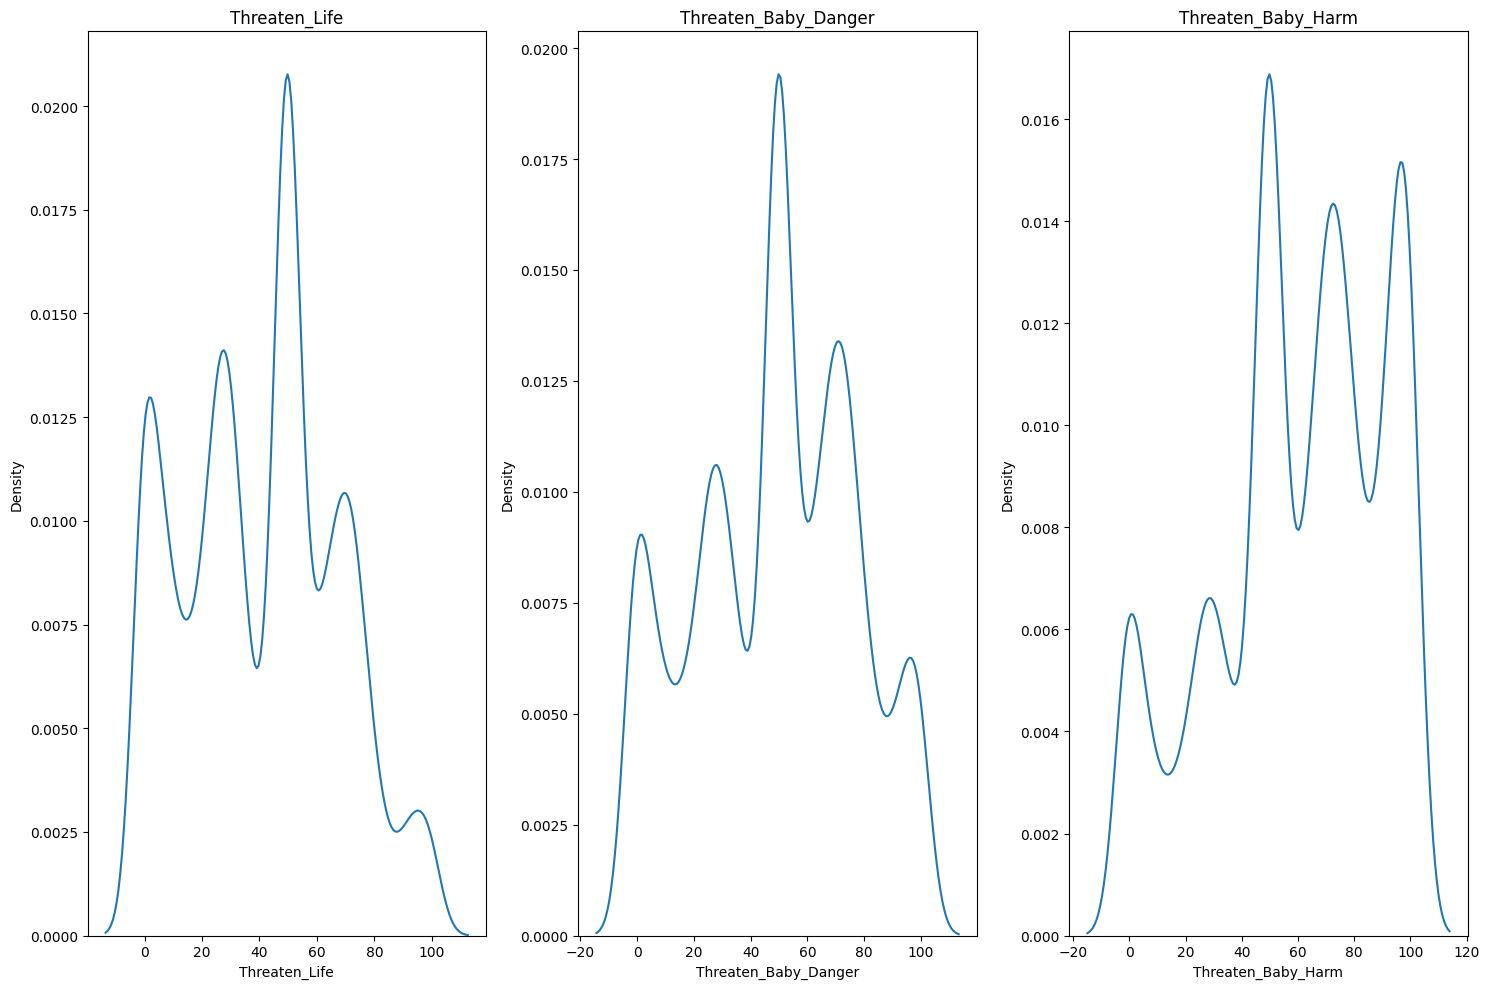

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axs = axs.flatten()
sns.kdeplot(data=mental_health['Threaten_Life'].replace(' ',-1).astype('int'), ax=axs[0])
axs[0].set_title('Threaten_Life')

sns.kdeplot(data=mental_health['Threaten_Baby_Danger'].replace(' ',-1).astype('int'), ax=axs[1])
axs[1].set_title('Threaten_Baby_Danger')

sns.kdeplot(data=mental_health['Threaten_Baby_Harm'].replace(' ',-1).astype('int'), ax=axs[2])
axs[2].set_title('Threaten_Baby_Harm')

plt.tight_layout()
plt.show()

In [ ]:
#Bivariate ananlysis

In [ ]:
mental_health["Gestational_Age_At_Birth"] = np.round(mental_health["Gestational_Age_At_Birth"]/4.33,2)

In [ ]:
mental_health["Birth_Weight"] = np.where(
    pd.isnull(mental_health["Birth_Weight"]),np.NaN,
    np.where((mental_health["Birth_Weight"] > 2550) & (mental_health["Birth_Weight"] < 4000),'Healthy','Unhealthy')
    )

In [ ]:
mental_health["Birth_Weight"].value_counts()

,count
Birth_Weight,
Healthy,5053
nan,4214
Unhealthy,1025


In [ ]:
mental_health["Birth_Length"] = np.where(
    pd.isnull(mental_health["Birth_Length"]),np.NaN,
    np.where((mental_health["Birth_Length"] > 39) & (mental_health["Birth_Length"] < 61),'Healthy','Unhealthy')
)

In [ ]:
mental_health["Birth_Length"].value_counts()

,count
Birth_Length,
Healthy,5313
nan,4812
Unhealthy,167


In [ ]:
#Analysis

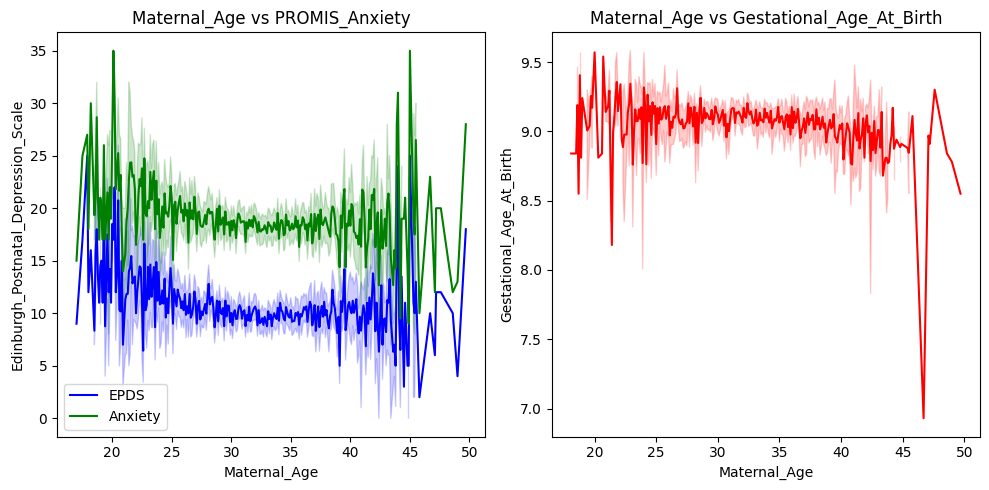

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (10,5))
axs = axs.flatten()


sns.lineplot(x="Maternal_Age", y="Edinburgh_Postnatal_Depression_Scale", data=mental_health, ax=axs[0],color="Blue",label="EPDS")
axs[0].set_title('Maternal_Age vs Edinburgh_Postnatal_Depression_Scale')

sns.lineplot(x="Maternal_Age", y="PROMIS_Anxiety", data=mental_health, ax=axs[0],color="green",label="Anxiety")
axs[0].set_title('Maternal_Age vs PROMIS_Anxiety')


sns.lineplot(x="Maternal_Age",y="Gestational_Age_At_Birth",data=mental_health,ax=axs[1],color="red")
axs[1].set_title('Maternal_Age vs Gestational_Age_At_Birth')

plt.tight_layout()
plt.show()

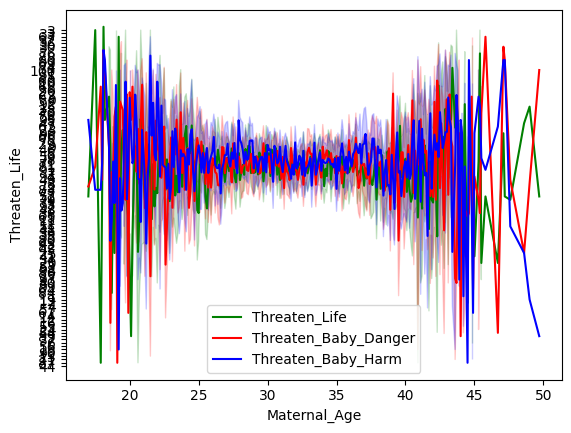

In [ ]:
sns.lineplot(x="Maternal_Age",y="Threaten_Life", data=mental_health,color="green", label="Threaten_Life")
sns.lineplot(x="Maternal_Age",y="Threaten_Baby_Danger", data=mental_health,color="red", label="Threaten_Baby_Danger")
sns.lineplot(x="Maternal_Age",y="Threaten_Baby_Harm", data=mental_health,color="blue", label="Threaten_Baby_Harm")
# plt.yticks(np.arange(-1,100,step=5))
plt.show()

In [ ]:
mental_health["Threaten_Life"].max()

100

In [ ]:
new_df = mental_health[mental_health["Delivery_Mode"].notnull()]

In [ ]:
new_df = new_df[["Delivery_Mode","Maternal_Age"]]

In [ ]:
new_df["Age_Category"] = np.where(
    new_df["Maternal_Age"] < 23,"UnderAge",
    np.where((new_df["Maternal_Age"] >= 23) & (new_df["Maternal_Age"] <= 38),"Healthy",
             "Old Age")
    )

In [ ]:
df = new_df.groupby("Age_Category")["Delivery_Mode"].value_counts().reset_index()
# new_df[["Age_Category","Delivery_Mode"]].value_counts()

In [ ]:
df

,Age_Category,Delivery_Mode,count
0,Healthy,Vaginally,3550
1,Healthy,Caesarean-section (c-section),1390
2,Old Age,Vaginally,311
3,Old Age,Caesarean-section (c-section),227
4,UnderAge,Vaginally,43
5,UnderAge,Caesarean-section (c-section),16


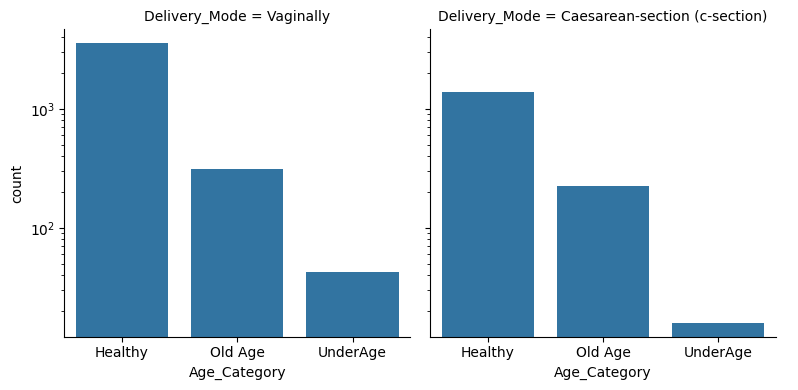

In [ ]:
sns.catplot(
    df, kind="bar",
    x="Age_Category", y="count", col="Delivery_Mode",
    height=4, aspect=1,
)
plt.yscale('log')
plt.show()

In [ ]:
cols = ["NICU_Stay","Birth_Weight","Birth_Length"]

In [ ]:
mental_health.columns

Index(['Maternal_Age', 'Household_Income', 'Maternal_Education',
       'Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety',
       'Gestational_Age_At_Birth',
       'Delivery_Date(converted to month and year)', 'Birth_Length',
       'Birth_Weight', 'Delivery_Mode', 'NICU_Stay', 'Threaten_Life',
       'Threaten_Baby_Danger', 'Threaten_Baby_Harm'],
      dtype='object')

In [ ]:
#logistic classification.
    #independent variable - continous
    # dependent - binary

In [ ]:
import statsmodels.api as sm

In [ ]:
for i in cols:
  df = mental_health[(mental_health[i]!='Data Missing') & (mental_health["Maternal_Age"].notnull())]


  if i == 'NICU_Stay':
    df["Binary"] = df[i].apply(lambda x: 1 if x == 'Yes' else 0)
  else:
    df["Binary"] = df[i].apply(lambda x: 1 if x == 'Unhealthy' else 0)


  X = df["Maternal_Age"]
  y= df["Binary"]


  x=sm.add_constant(X)

  logit_model = sm.Logit(y,x)
  result = logit_model.fit()


  p_value = result.pvalues['Maternal_Age']
  alpha =0.0167 #(0.05/3)
  print(p_value)
  if p_value < alpha:
    print(f"There is a significant associaton  between the  age of  pregnant  women and likelihood of {i}")
  else:
    print(f"There is no  significant associaton  between the  age of  pregnant  women and  likelihood of {i}")


Optimization terminated successfully.
         Current function value: 0.206888
         Iterations 7
1.691834847014203e-08
There is a significant associaton  between the  age of  pregnant  women and likelihood of NICU_Stay
Optimization terminated successfully.
         Current function value: 0.321890
         Iterations 6
1.0338053505880701e-09
There is a significant associaton  between the  age of  pregnant  women and likelihood of Birth_Weight
Optimization terminated successfully.
         Current function value: 0.082896
         Iterations 8
0.024870965531769335
There is no  significant associaton  between the  age of  pregnant  women and  likelihood of Birth_Length


<ipython-input-41-861cdc966815>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Binary"] = df[i].apply(lambda x: 1 if x == 'Yes' else 0)
<ipython-input-41-861cdc966815>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Binary"] = df[i].apply(lambda x: 1 if x == 'Unhealthy' else 0)
<ipython-input-41-861cdc966815>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

####Conclusion

- If a lady is in the age group 25-38 while conceiving she will not be under any anxiety attacks , moreover she will also not suffer from any after-pregnancy depression and can take care of herself and her new born more effectively.

- If a female is conceiving beyond the age of 42, this is very risky for the baby as there are very high chances of pre-mature birth of the baby and the pre-mature birth may be in less than 7.5 months of gestation periods.

- Female of the age group 25-42 are less worried about the impact of covid-19 on them and their new born health, damang, they are less worried as compared to females who conceived in less than 25 and females conceiving in after the age 45. its also evident that female after the age of 43 are more worried about the impact of covid-19 on lady and baby , this may be reason for high anxiety and after-pregnency depression in this age group

- After the age of 38, there is a notable 13%[28-41%] increase in the likelihood of women requiring a c-section rather than opting for a natural delivery. this statistic underscores the physiological changes associated with maternal age and their implications for childbirth.

- On testing the relationship between maternal age and [ will the new born need intensive medical supervision after birth , healthy or unhealthy weight, healthy or unhealthy height] ,by hypothesis testing , it was found that there is a significant association between the age of pregnant women and the likelihood of NICU_Stay and babe having unhealthy weight, however there is no evidence for significant association between age and height of new born.

- High anxiety , depression , premature birth can be reason for admission of babe to NICU after delivery.

In [ ]:
#household income

In [ ]:
categories = mental_health["Household_Income"].unique()

In [ ]:
categories

array(['$200,000+', '$100,000 -$124,999', '$40,000-$69,999',
       '$150,000 - $174,999', nan, '$70,000-$99,999',
       '$175,000- $199,999', '$125,000- $149,999', '$20,000- $39,999',
       'Less than $20, 000'], dtype=object)

In [ ]:
import plotly.express as px

#get unique categories of income
categories = mental_health['Household_Income'].unique()

for i  in categories:
  df= mental_health[mental_health['Household_Income']==i]
  fig= px.histogram(mental_health, x='PROMIS_Anxiety', color='Household_Income',
                   title='Distribution of Anxiety by household income',
                    hover_data= mental_health.columns)


fig.update_layout(
    xaxis_title="PROMIS_Anxiety",
    yaxis_title="Count",
    legend_title="Household Income",
    barmode= 'overlay'   #overlay histogram fro better comparison.
)

fig.show()

In [ ]:
import plotly.express as px

#get unique categories of income
categories = mental_health['Household_Income'].unique()

for i  in categories:
  df= mental_health[mental_health['Household_Income']==i]
  fig= px.histogram(mental_health, x='Edinburgh_Postnatal_Depression_Scale', color='Household_Income',
                   title='Distribution of EPDS by household income',
                    hover_data= mental_health.columns)


fig.update_layout(
    xaxis_title="Edinburgh_Postnatal_Depression_Scale",
    yaxis_title="Count",
    legend_title="Household Income",
    barmode= 'overlay'   #overlay histogram fro better comparison.
)

fig.show()

In [ ]:
df= mental_health[mental_health['Threaten_Life']!=-1]
df['Threaten_Life']= df['Threaten_Life'].astype('int')

<ipython-input-47-2745dbd4c4b9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df["Threaten_Life"].value_counts()

,count
Threaten_Life,
50,819
0,493
49,279
48,274
47,222
...,...
84,20
86,19
89,18


In [ ]:
df.groupby("Household_Income")["Threaten_Life"].mean().reset_index().sort_values("Threaten_Life",ascending=False)

,Household_Income,Threaten_Life
8,"Less than $20, 000",50.771028
4,"$20,000- $39,999",47.727106
6,"$40,000-$69,999",45.215491
7,"$70,000-$99,999",42.388205
0,"$100,000 -$124,999",41.783813
2,"$150,000 - $174,999",41.392463
1,"$125,000- $149,999",40.482463
3,"$175,000- $199,999",40.062300
5,"$200,000+",39.456635


In [ ]:
df= mental_health[mental_health['Threaten_Baby_Harm']!=' ']
df['Threaten_Baby_Harm']= df['Threaten_Baby_Harm'].astype('int')

<ipython-input-50-60a92c873fb9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.groupby("Household_Income")["Threaten_Baby_Harm"].mean().reset_index().sort_values("Threaten_Baby_Harm",ascending=False)

,Household_Income,Threaten_Baby_Harm
8,"Less than $20, 000",66.985915
4,"$20,000- $39,999",66.718464
7,"$70,000-$99,999",63.633470
6,"$40,000-$69,999",63.476263
0,"$100,000 -$124,999",62.386327
1,"$125,000- $149,999",62.027301
3,"$175,000- $199,999",60.517572
5,"$200,000+",60.134937
2,"$150,000 - $174,999",59.983501


In [ ]:
df= mental_health[mental_health['Threaten_Baby_Danger']!=' ']
df['Threaten_Baby_Danger']= df['Threaten_Baby_Danger'].astype('int')

<ipython-input-52-68bcfcb66c81>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.groupby("Household_Income")["Threaten_Baby_Danger"].mean().reset_index().sort_values("Threaten_Baby_Danger",ascending=False)

,Household_Income,Threaten_Baby_Danger
8,"Less than $20, 000",60.276995
4,"$20,000- $39,999",58.310786
6,"$40,000-$69,999",53.740031
7,"$70,000-$99,999",52.033933
0,"$100,000 -$124,999",50.288200
1,"$125,000- $149,999",48.904762
2,"$150,000 - $174,999",48.456382
3,"$175,000- $199,999",46.923200
5,"$200,000+",46.885057


### CONCLUSIONS

- It is evident from the observations that individuals living below the poverty line ($70,000) are significantly more susceptible to anxiety and EPDS (Edinburgh Postnatal Depression Scale) scores. Within this income bracket, nearly 70% of the population has been diagnosed with anxiety and depression, exacerbated by the conditions brought on by the COVID-19 pandemic.

- There is a positive correlation between increased income and reduced probability of anxiety and depression. High-income individuals have approximately a 33% chance of being diagnosed with anxiety and depression due to COVID-19, indicating a substantial mental health benefit associated with higher income levels.


- The COVID-19 pandemic has had a profoundly adverse impact on low-income families, particularly those below the survival line. The shortage of income has heightened their worries about the well-being of their children and women. Families below the survival line exhibit a very high threatening score for women, with an average score of 51/100. In contrast, as income levels rise, concerns diminish, likely due to better access to healthcare facilities for higher-income families.

- Unlike the varying threatening scores for women across income levels, the concern for the impact of COVID-19 on newborns is universal. Regardless of income, all categories show significant worry about potential harm and damage to newborns, which may contribute to high anxiety levels in pregnant women during the pandemic.

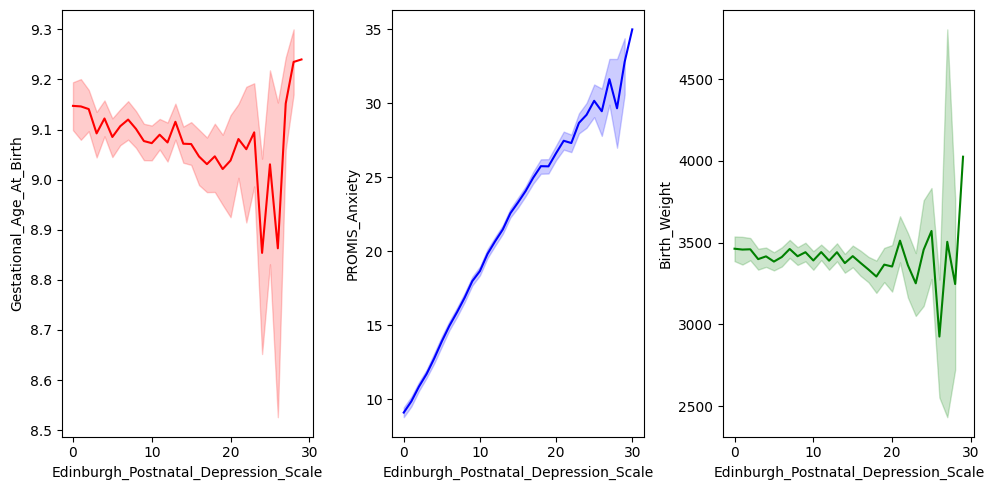

In [ ]:

fig,axs= plt.subplots(1,3, figsize=(10,5))
axs= axs.flatten()


sns.lineplot(x='Edinburgh_Postnatal_Depression_Scale', y='Gestational_Age_At_Birth', data=mental_health, color='red', ax=axs[0])
sns.lineplot(x='Edinburgh_Postnatal_Depression_Scale', y='PROMIS_Anxiety', data=mental_health, color='blue', ax=axs[1])
sns.lineplot(x='Edinburgh_Postnatal_Depression_Scale', y='Birth_Weight', data=mental_health_copy, color='green', ax=axs[2])

plt.tight_layout()
plt.show()

In [ ]:
mental_health["Birth_Weight"]

,Birth_Weight
0,Healthy
1,nan
3,Unhealthy
4,Healthy
5,nan
...,...
10766,nan
10767,nan
10769,nan
10770,nan


In [ ]:
df1 = mental_health[(mental_health["Birth_Weight"] != 'nan') & (mental_health["Birth_Length"] != 'nan')]

In [ ]:
df1 = df1[df1["Delivery_Mode"].notnull()]

In [ ]:
df1["Delivery_Mode"].isna().sum()

0

In [ ]:
df1

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,38.3,"$200,000+",Masters degree,9.0,13.0,9.17,Dec2020,Healthy,Healthy,Vaginally,No,2,3,27
3,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,8.91,Dec2020,Healthy,Unhealthy,Vaginally,No,53,67,54
4,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,9.21,Oct2020,Healthy,Healthy,Caesarean-section (c-section),No,23,32,71
7,NaN,NaN,NaN,NaN,NaN,8.78,May2021,Healthy,Healthy,Caesarean-section (c-section),Yes,-1,,
8,33.1,"$100,000 -$124,999",College/trade school,1.0,7.0,9.44,Nov2020,Healthy,Unhealthy,Vaginally,No,27,76,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10755,41.7,"$175,000- $199,999",Undergraduate degree,19.0,21.0,8.88,Aug2020,Healthy,Healthy,Caesarean-section (c-section),No,94,94,91
10756,27.8,"$150,000 - $174,999",Masters degree,8.0,19.0,8.97,Aug2020,Healthy,Healthy,Caesarean-section (c-section),No,45,82,86
10757,36.2,"$150,000 - $174,999",Undergraduate degree,3.0,9.0,8.91,Jul2020,Healthy,Healthy,Vaginally,No,70,32,75
10761,33.2,"$125,000- $149,999",College/trade school,0.0,8.0,9.60,Oct2020,Healthy,Healthy,Vaginally,No,0,13,17


In [ ]:
df1[["Birth_Weight","Delivery_Mode"]].value_counts().reset_index()

,Birth_Weight,Delivery_Mode,count
0,Healthy,Vaginally,3287
1,Healthy,Caesarean-section (c-section),1274
2,Unhealthy,Vaginally,579
3,Unhealthy,Caesarean-section (c-section),339


In [ ]:
df1[["Birth_Length","Delivery_Mode"]].value_counts().reset_index()


,Birth_Length,Delivery_Mode,count
0,Healthy,Vaginally,3762
1,Healthy,Caesarean-section (c-section),1550
2,Unhealthy,Vaginally,104
3,Unhealthy,Caesarean-section (c-section),63


In [ ]:
df2 = df1[df1["NICU_Stay"].notnull()]

In [ ]:
df2[["Birth_Weight","NICU_Stay"]].value_counts().reset_index()

,Birth_Weight,NICU_Stay,count
0,Healthy,No,4216
1,Unhealthy,No,721
2,Healthy,Yes,345
3,Unhealthy,Yes,197


In [ ]:
df2[["Birth_Length","NICU_Stay"]].value_counts().reset_index()

,Birth_Length,NICU_Stay,count
0,Healthy,No,4807
1,Healthy,Yes,505
2,Unhealthy,No,130
3,Unhealthy,Yes,37


### CONCLUSIONS

- Observational data indicates a significant correlation between high EPDS scores and the likelihood of pre-mature births. However, it's important to note that these pre-mature births generally occur after 8.5 months of gestation, which falls within the medically accepted range and thus, poses minimal health risks to the newborn.

- Women experiencing high levels of EPDS or anxiety are likely to experience the other condition at similar intensity levels. This linear association suggests that an increase in one condition directly correlates with an increase in the other, highlighting the intertwined nature of these mental health challenges.

- There is a 37% probability that women with babies of unhealthy birth weight will undergo a C-section, which is 10% higher than the likelihood for those with babies of healthy birth weight. This pattern is similarly observed with birth height, indicating a strong link between unhealthy birth metrics and the necessity for C-sections.

- A particularly alarming statistic is that babies with unhealthy birth weight have a 22% chance of requiring a NICU stay, which is 15% higher than for babies with healthy birth weight. This same trend is evident with birth height, underscoring the critical importance of healthy birth metrics in reducing the need for intensive neonatal care.

In [ ]:
#multivariate Analysis
#vulnerable groups - These are the groups that are mostly effected when any pandemic occurs

In [ ]:
mental_health.groupby(["Maternal_Age","Household_Income","Maternal_Education"])["Edinburgh_Postnatal_Depression_Scale"].mean().reset_index().sort_values("Edinburgh_Postnatal_Depression_Scale", ascending=False).head(30)

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale
2644,34.3,"$20,000- $39,999",College/trade school,29.0
51,20.5,"$40,000-$69,999",College/trade school,29.0
2037,32.1,"$40,000-$69,999",High school diploma,28.0
4048,42.2,"$40,000-$69,999",College/trade school,28.0
992,28.2,"Less than $20, 000",College/trade school,27.0
27,19.6,"$20,000- $39,999",High school diploma,27.0
42,20.2,"Less than $20, 000",College/trade school,27.0
3274,36.7,"$40,000-$69,999",Less than high school diploma,26.0
627,26.5,"$20,000- $39,999",Undergraduate degree,26.0
1714,31.0,"$20,000- $39,999",High school diploma,26.0


In [ ]:
#lets see  the probability of   women with low EPDS  having high  Anxiety

a= len(mental_health[mental_health['Edinburgh_Postnatal_Depression_Scale']<12])
b= len(mental_health[(mental_health['Edinburgh_Postnatal_Depression_Scale']<12)&(mental_health['PROMIS_Anxiety']>20)])

print(f"Probability of women having low EPDS and high Anxiety is {(b/a)*100}")


#lets see  the probability of   women with high EPDS  having high  Anxiety

a= len(mental_health[mental_health['Edinburgh_Postnatal_Depression_Scale']>12])
b= len(mental_health[(mental_health['Edinburgh_Postnatal_Depression_Scale']>12)&(mental_health['PROMIS_Anxiety']>20)])

print(f"Probability of women having high EPDS and high Anxiety is {(b/a)*100}")

Probability of women having low EPDS and high Anxiety is 14.884768670940913
Probability of women having high EPDS and high Anxiety is 81.31833801936895


In [ ]:
df= mental_health.copy()

In [ ]:
df= df[(df['Threaten_Life']!=' ')&(df['Threaten_Baby_Harm']!=' ')&(df['Threaten_Baby_Danger']!=' ')]

In [ ]:
df['Threaten_Baby_Danger']= df['Threaten_Baby_Danger'].astype('int')
df['Threaten_Life']= df['Threaten_Life'].astype('int')
df['Threaten_Baby_Harm']= df['Threaten_Baby_Harm'].astype('int')

In [ ]:
df.groupby(
    ['Maternal_Age','Household_Income','Maternal_Education']
).agg({'Threaten_Life':'mean','Threaten_Baby_Harm':'mean','Threaten_Baby_Danger':'mean'}).reset_index().sort_values(
    by= ['Threaten_Life','Threaten_Baby_Harm','Threaten_Baby_Danger'], ascending=False
).head(40)

,Maternal_Age,Household_Income,Maternal_Education,Threaten_Life,Threaten_Baby_Harm,Threaten_Baby_Danger
53,20.6,"$20,000- $39,999",High school diploma,100.0,100.0,100.0
524,25.9,"$20,000- $39,999",College/trade school,100.0,100.0,100.0
761,27.2,"$40,000-$69,999",College/trade school,100.0,100.0,100.0
876,27.8,"$100,000 -$124,999",Masters degree,100.0,100.0,100.0
898,27.9,"$100,000 -$124,999",College/trade school,100.0,100.0,100.0
932,28.0,"$40,000-$69,999",College/trade school,100.0,100.0,100.0
969,28.2,"$150,000 - $174,999",College/trade school,100.0,100.0,100.0
1460,30.1,"Less than $20, 000",College/trade school,100.0,100.0,100.0
1557,30.5,"$20,000- $39,999",High school diploma,100.0,100.0,100.0
2245,32.9,"$40,000-$69,999",High school diploma,100.0,100.0,100.0


### CONCLUSIONS
- The most vulnerable group to high scores on the Edinburgh Postnatal Depression Scale (EPDS) consists of women of all age groups with low household income and low education levels. However, there are notable instances where women from high-income and highly educated backgrounds are also susceptible to high EPDS scores. This vulnerability predominantly affects women aged 40 and above, suggesting that advanced maternal age can be a significant risk factor for depression during pregnancy and postpartum.


- There is a 14% likelihood that women with low EPDS (depression) scores will experience high anxiety. Conversely, women with high EPDS scores have an 81% chance of also experiencing high anxiety, particularly exacerbated by the stress and uncertainties brought on by the COVID-19 pandemic. This strong correlation underscores the compounded mental health challenges faced by this group during such crises.

- Families with low income, regardless of age and education levels, exhibit heightened concerns about the health and safety of the mother and newborn due to COVID-19. This widespread anxiety reflects the profound impact of socioeconomic status on perceived vulnerability and health security during the pandemic

- Individuals with a master’s degree but low income, and those with high income but lower education levels, share similar levels of concern about the impact of COVID-19 on the mother and newborn. This finding highlights that both education and income are equally significant factors in determining the level of worry and perceived risk related to the pandemic's effects on maternal and infant health.
